In [33]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math

In [37]:
def euler_method(f, h=0.1, steps=5, y0=0, t0=0):
    # step, t_k, y_k, f(t_k, y_k), h, f*h
    data = []
    t = t0
    y = y0
    for step in range(steps+1):
        data.append((step, t, y, f(t, y), h, f(t, y)*h))
        t = t + h
        y = y + f(t,y)*h
    return data

In [11]:
def f(t,y):
    return y

In [30]:
data = euler_method(f, h=0.1, steps=5, y0=1, t0=0)

In [36]:
def line_tex(tup):
    out = ""
    for d in tup[:-1]:
        out += str(d)[:6]
        out += "  &"
    out += str(tup[-1])[:6] + " \\\\"
    return out

def to_tex(data):
    ret = """\\begin{tabular}{cccccc}
$k$ & $t_k$ & $y_k$ & $f(t_k, y_k)$ & $h$ & $f(t_k, y_k)h$ \\\\
\midrule
"""
    for tup in data:
        ret += line_tex(tup) + "\n"
    ret += "\end{tabular}"
    return ret

In [32]:
print(to_tex(data))

egin{table}{cccccc}
$k$ & $t_k$ & $y_k$ & $f(t_k, y_k)$ & $h$ & $f(t_k, y_k)h$ \\
0  &0  &1  &1  &0.1  &0.1 \\
0  &0.1  &1.1  &1.1  &0.1  &0.1100 \\
0  &0.2  &1.2100  &1.2100  &0.1  &0.1210 \\
0  &0.3000  &1.3310  &1.3310  &0.1  &0.1331 \\
0  &0.4  &1.4641  &1.4641  &0.1  &0.1464 \\
0  &0.5  &1.6105  &1.6105  &0.1  &0.1610 \\
\end{table}


In [38]:
def f(t,y):
    return y
data = euler_method(f, h=0.1, steps=5, y0=1, t0=0)
print(to_tex(data))

\begin{table}{cccccc}
$k$ & $t_k$ & $y_k$ & $f(t_k, y_k)$ & $h$ & $f(t_k, y_k)h$ \\
\midrule
0  &0  &1  &1  &0.1  &0.1 \\
1  &0.1  &1.1  &1.1  &0.1  &0.1100 \\
2  &0.2  &1.2100  &1.2100  &0.1  &0.1210 \\
3  &0.3000  &1.3310  &1.3310  &0.1  &0.1331 \\
4  &0.4  &1.4641  &1.4641  &0.1  &0.1464 \\
5  &0.5  &1.6105  &1.6105  &0.1  &0.1610 \\
\end{table}


In [39]:
def f(t,y):
    return 5 - y
data = euler_method(f, h=0.1, steps=5, y0=0, t0=0)
print(to_tex(data))

\begin{table}{cccccc}
$k$ & $t_k$ & $y_k$ & $f(t_k, y_k)$ & $h$ & $f(t_k, y_k)h$ \\
\midrule
0  &0  &0  &5  &0.1  &0.5 \\
1  &0.1  &0.5  &4.5  &0.1  &0.45 \\
2  &0.2  &0.95  &4.05  &0.1  &0.405 \\
3  &0.3000  &1.355  &3.645  &0.1  &0.3645 \\
4  &0.4  &1.7195  &3.2805  &0.1  &0.3280 \\
5  &0.5  &2.0475  &2.9524  &0.1  &0.2952 \\
\end{table}


In [55]:
# y' = y - t, 0.2, 0.1, 0.05 on 0,1
def f(t,y):
    return y - t
data2 = euler_method(f, h=0.2, steps=5, y0=0, t0=0)
data1 = euler_method(f, h=0.1, steps=10, y0=0, t0=0)
data5 = euler_method(f, h=0.05, steps=20, y0=0, t0=0)

In [71]:
xs2 = []
ys2 = []
for d in data2:
    xs2.append(d[1])
    ys2.append(d[2])
xs1 = []
ys1 = []
for d in data1:
    xs1.append(d[1])
    ys1.append(d[2])

xs5 = []
ys5 = []
for d in data5:
    xs5.append(d[1])
    ys5.append(d[2])

def g(t):
    return t + 1 - math.exp(t)
xs = np.linspace(0, 1)
ys = np.array(list(map(g, xs)))


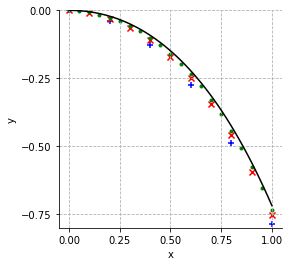

In [76]:
savename = "6.pdf"
FIGSIZEX = 4
FIGSIZEY = 4
plt.scatter(xs2, ys2, marker="+", color="b")
plt.scatter(xs1, ys1, marker="x", color="r")
plt.scatter(xs5, ys5, marker=".", color="g")
plt.plot(xs, ys, color="k")

axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
xticks = [0.25*(-10 + x) for x in range(21)]
yticks = [0.25*(-20 + x) for x in range(41)]
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlim([-.05, 1.05])
plt.ylim([-0.8, 0])
plt.xlabel("x")
plt.ylabel("y")
axes.grid(True, linestyle='--')

fig = plt.gcf()
fig.set_size_inches(FIGSIZEX, FIGSIZEY)
fig.savefig(savename, bbox_inches='tight')

In [77]:
xs2

[0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0]

In [78]:
ys2

[0,
 -0.04000000000000001,
 -0.12800000000000003,
 -0.27360000000000007,
 -0.4883200000000001,
 -0.7859840000000001]

In [83]:
# y' = 2y + t e^{2t}, 0.2, 0.1, 0.05 on 0,1
def f(t,y):
    return 2*y + t * math.exp(2*t)
data2 = euler_method(f, h=0.2, steps=5, y0=1, t0=0)
data1 = euler_method(f, h=0.1, steps=10, y0=1, t0=0)
data5 = euler_method(f, h=0.05, steps=20, y0=1, t0=0)

xs2 = []
ys2 = []
for d in data2:
    xs2.append(d[1])
    ys2.append(d[2])
xs1 = []
ys1 = []
for d in data1:
    xs1.append(d[1])
    ys1.append(d[2])

xs5 = []
ys5 = []
for d in data5:
    xs5.append(d[1])
    ys5.append(d[2])

def g(t):
    return .5 * t**2 * math.exp(2*t) + math.exp(2*t)
xs = np.linspace(0, 1)
ys = np.array(list(map(g, xs)))

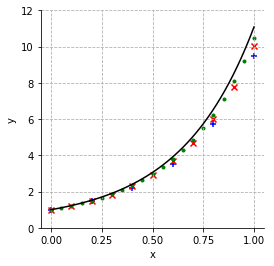

In [85]:
savename = "8.pdf"
FIGSIZEX = 4
FIGSIZEY = 4
plt.scatter(xs2, ys2, marker="+", color="b")
plt.scatter(xs1, ys1, marker="x", color="r")
plt.scatter(xs5, ys5, marker=".", color="g")
plt.plot(xs, ys, color="k")

axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
xticks = [0.25*(-10 + x) for x in range(21)]
yticks = [2*(-20 + x) for x in range(41)]
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlim([-.05, 1.05])
plt.ylim([0, 12])
plt.xlabel("x")
plt.ylabel("y")
axes.grid(True, linestyle='--')

fig = plt.gcf()
fig.set_size_inches(FIGSIZEX, FIGSIZEY)
fig.savefig(savename, bbox_inches='tight')

In [87]:
def f(t,y):
    return 12*y*(4-y)
data = euler_method(f, h=0.04, steps=50, y0=1, t0=0)
print(to_tex(data))

\begin{table}{cccccc}
$k$ & $t_k$ & $y_k$ & $f(t_k, y_k)$ & $h$ & $f(t_k, y_k)h$ \\
\midrule
0  &0  &1  &36  &0.04  &1.44 \\
1  &0.04  &2.44  &45.676  &0.04  &1.8270 \\
2  &0.08  &4.2670  &-13.67  &0.04  &-0.547 \\
3  &0.12  &3.7200  &12.496  &0.04  &0.4998 \\
4  &0.16  &4.2199  &-11.13  &0.04  &-0.445 \\
5  &0.2  &3.7744  &10.216  &0.04  &0.4086 \\
6  &0.2400  &4.1830  &-9.190  &0.04  &-0.367 \\
7  &0.28  &3.8154  &8.4489  &0.04  &0.3379 \\
8  &0.32  &4.1534  &-7.646  &0.04  &-0.305 \\
9  &0.36  &3.8475  &7.0387  &0.04  &0.2815 \\
10  &0.3999  &4.1290  &-6.396  &0.04  &-0.255 \\
11  &0.4399  &3.8732  &5.8921  &0.04  &0.2356 \\
12  &0.4799  &4.1089  &-5.370  &0.04  &-0.214 \\
13  &0.5199  &3.8941  &4.9484  &0.04  &0.1979 \\
14  &0.5599  &4.0920  &-4.519  &0.04  &-0.180 \\
15  &0.6  &3.9112  &4.1652  &0.04  &0.1666 \\
16  &0.64  &4.0778  &-3.810  &0.04  &-0.152 \\
17  &0.68  &3.9254  &3.5115  &0.04  &0.1404 \\
18  &0.7200  &4.0659  &-3.216  &0.04  &-0.128 \\
19  &0.7600  &3.9372  &2.963

In [88]:
xs2 = []
ys2 = []
for d in data:
    xs2.append(d[1])
    ys2.append(d[2])

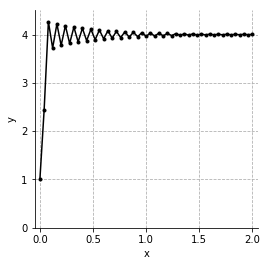

In [91]:
savename = "10.pdf"
FIGSIZEX = 4
FIGSIZEY = 4
plt.plot(xs2, ys2, marker=".", color="k")
#plt.scatter(xs1, ys1, marker="x", color="r")
#plt.scatter(xs5, ys5, marker=".", color="g")
#plt.plot(xs, ys, color="k")

axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
xticks = [0.5*(-10 + x) for x in range(21)]
yticks = [1*(-20 + x) for x in range(41)]
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlim([-.05, 2.05])
plt.ylim([0, 4.5])
plt.xlabel("x")
plt.ylabel("y")
axes.grid(True, linestyle='--')

fig = plt.gcf()
fig.set_size_inches(FIGSIZEX, FIGSIZEY)
fig.savefig(savename, bbox_inches='tight')

In [16]:
def euler_method3(f, g, h=0.1, steps=5, x0=0, y0=0, t0=0):
    # step, t_k, x_k, y_k, f(t_k, x_k, y_k), g(t_k, x_k, y_k), h, f*h, g*h
    data = []
    x = x0
    t = t0
    y = y0
    for step in range(steps+1):
        datum = (step, t, x, y, f(t, x, y), g(t, x, y), h, f(t, x, y)*h, g(t,x,y)*h)
        data.append(datum)
        t = t + h
        x = x + datum[-2]
        y = y + datum[-1]
    return data

In [17]:
def f(t,x,y):
    return y
def g(t,x,y):
    return -x
data = euler_method3(f,g,h=0.1, steps=5, x0=1, y0=-1, t0=0)
disp = []
for d in data:
    disp.append((d[0], d[1], d[2], d[3], d[7], d[8]))

In [18]:
def line_tex(tup):
    out = ""
    for d in tup[:-1]:
        out += str(d)[:6]
        out += "  &"
    out += str(tup[-1])[:6] + " \\\\"
    return out

def to_tex(data):
    ret = """\\begin{tabular}{cccccc}
$k$ & $t_k$ & $x_k$ & $y_k$ & $f(t_k, x_k, y_k)h$ & $g(t_k, x_k, y_k)h$ \\\\
\midrule
"""
    for tup in data:
        ret += line_tex(tup) + "\n"
    ret += "\end{tabular}"
    return ret

In [19]:
print(to_tex(disp))

\begin{tabular}{cccccc}
$k$ & $t_k$ & $x_k$ & $y_k$ & $f(t_k, x_k, y_k)h$ & $g(t_k, x_k, y_k)h$ \\
\midrule
0  &0  &1  &-1  &-0.1  &-0.1 \\
1  &0.1  &0.9  &-1.1  &-0.110  &-0.090 \\
2  &0.2  &0.79  &-1.190  &-0.119  &-0.079 \\
3  &0.3000  &0.671  &-1.269  &-0.126  &-0.067 \\
4  &0.4  &0.5441  &-1.336  &-0.133  &-0.054 \\
5  &0.5  &0.4104  &-1.390  &-0.139  &-0.041 \\
\end{tabular}


In [24]:
def runge_2order(f, h=0.1, t0=0, y0=0, steps=5):
    data = []
    t = t0
    y = y0
    for step in range(steps+1):
        s1 = f(t,y)
        s2 = f(t+h, y+h*s1)
        datum = (step, t, y, s1, s2, h, h*(s1+s2)*.5)
        data.append(datum)
        y = y + h*(s1 + s2)*.5
        t = t + h
    return data

In [28]:
def line_tex(tup):
    out = ""
    for d in tup[:-1]:
        out += str(d)[:6]
        out += "  &"
    out += str(tup[-1])[:6] + " \\\\"
    return out

def to_tex(data):
    ret = """\\begin{tabular}{ccccccc}
$k$ & $t_k$ & $y_k$ & $s_1$ & $s_2$ & $h$ & $h(s_1+s_2)/2$ \\\\
\midrule
"""
    for tup in data:
        ret += line_tex(tup) + "\n"
    ret += "\end{tabular}"
    return ret

In [26]:
def f(t,y):
    return y
data = runge_2order(f, t0=0, y0=1, h=0.1, steps=5)

In [27]:
print(to_tex(data))

\begin{tabular}{cccccc}
$k$ & $t_k$ & $y_k$ & $s_1$ & $s_2$ & $h$ & $h(s_1+s_2)/2$ \\
\midrule
0  &0  &1  &1  &1.1  &0.1  &0.1050 \\
1  &0.1  &1.105  &1.105  &1.2155  &0.1  &0.1160 \\
2  &0.2  &1.2210  &1.2210  &1.3431  &0.1  &0.1282 \\
3  &0.3000  &1.3492  &1.3492  &1.4841  &0.1  &0.1416 \\
4  &0.4  &1.4909  &1.4909  &1.6399  &0.1  &0.1565 \\
5  &0.5  &1.6474  &1.6474  &1.8121  &0.1  &0.1729 \\
\end{tabular}


In [30]:
def f(t,y):
    return 5-y
data = runge_2order(f, t0=0, y0=0, h=0.1, steps=5)
print(to_tex(data))

\begin{tabular}{ccccccc}
$k$ & $t_k$ & $y_k$ & $s_1$ & $s_2$ & $h$ & $h(s_1+s_2)/2$ \\
\midrule
0  &0  &0  &5  &4.5  &0.1  &0.4750 \\
1  &0.1  &0.4750  &4.525  &4.0725  &0.1  &0.4298 \\
2  &0.2  &0.9048  &4.0951  &3.6856  &0.1  &0.3890 \\
3  &0.3000  &1.2939  &3.7060  &3.3354  &0.1  &0.3520 \\
4  &0.4  &1.6459  &3.3540  &3.0186  &0.1  &0.3186 \\
5  &0.5  &1.9646  &3.0353  &2.7318  &0.1  &0.2883 \\
\end{tabular}


In [34]:
#y' = -2ty^2, y(0)=1, 0.2, 0.1, 0.05 on [0,1]
# y' = 2y + t e^{2t}, 0.2, 0.1, 0.05 on 0,1
def f(t,y):
    return -2*t*y**2
data2 = runge_2order(f, h=0.2, steps=5, y0=1, t0=0)
data1 = runge_2order(f, h=0.1, steps=10, y0=1, t0=0)
data5 = runge_2order(f, h=0.05, steps=20, y0=1, t0=0)

xs2 = []
ys2 = []
for d in data2:
    xs2.append(d[1])
    ys2.append(d[2])
xs1 = []
ys1 = []
for d in data1:
    xs1.append(d[1])
    ys1.append(d[2])

xs5 = []
ys5 = []
for d in data5:
    xs5.append(d[1])
    ys5.append(d[2])

def g(t):
    return 1/(t**2 + 1)
xs = np.linspace(0, 1)
ys = np.array(list(map(g, xs)))

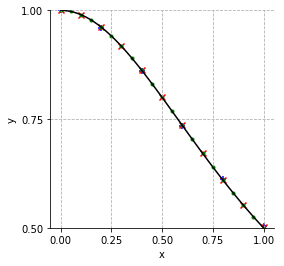

In [38]:
savename = "6_6.pdf"
FIGSIZEX = 4
FIGSIZEY = 4
plt.scatter(xs2, ys2, marker="+", color="b")
plt.scatter(xs1, ys1, marker="x", color="r")
plt.scatter(xs5, ys5, marker=".", color="g")
plt.plot(xs, ys, color="k")

axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
xticks = [0.25*(-10 + x) for x in range(21)]
yticks = [0.25*(-20 + x) for x in range(41)]
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlim([-.05, 1.05])
plt.ylim([0.5, 1])
plt.xlabel("x")
plt.ylabel("y")
axes.grid(True, linestyle='--')

fig = plt.gcf()
fig.set_size_inches(FIGSIZEX, FIGSIZEY)
fig.savefig(savename, bbox_inches='tight')

In [42]:
ys1

[1,
 0.99,
 0.96136555443192,
 0.9172458073323593,
 0.8619543198099594,
 0.8000340250544267,
 0.7355270186754421,
 0.6715870547645136,
 0.6103987848313074,
 0.5532890885187934,
 0.5009185758575371]

In [43]:
ys2

[1,
 0.96,
 0.86029775536128,
 0.7350425008089037,
 0.6115716703493418,
 0.503338255442106]

In [44]:
ys5

[1,
 0.9975,
 0.9900869553070392,
 0.9779784155730878,
 0.9615192399682526,
 0.9411577547131251,
 0.9174167488531677,
 0.8908626077586689,
 0.8620756483796894,
 0.8316240629150812,
 0.8000430034473954,
 0.7678194520757603,
 0.7353827705684649,
 0.703100290618703,
 0.6712770046492447,
 0.6401583162459162,
 0.6099348547532878,
 0.5807484930157808,
 0.5526988818140524,
 0.5258499937762168,
 0.5002363315673811]

In [45]:
def f(t,y):
    return 1.0 * t/y
data2 = runge_2order(f, h=0.2, steps=5, y0=1, t0=0)
data1 = runge_2order(f, h=0.1, steps=10, y0=1, t0=0)
data5 = runge_2order(f, h=0.05, steps=20, y0=1, t0=0)

xs2 = []
ys2 = []
for d in data2:
    xs2.append(d[1])
    ys2.append(d[2])
xs1 = []
ys1 = []
for d in data1:
    xs1.append(d[1])
    ys1.append(d[2])

xs5 = []
ys5 = []
for d in data5:
    xs5.append(d[1])
    ys5.append(d[2])

def g(t):
    return (t**2 + 1)**.5
xs = np.linspace(0, 1)
ys = np.array(list(map(g, xs)))

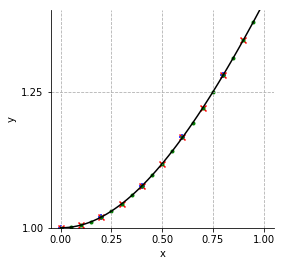

In [55]:
savename = "6_8.pdf"
FIGSIZEX = 4
FIGSIZEY = 4
plt.scatter(xs2, ys2, marker="+", color="b")
plt.scatter(xs1, ys1, marker="x", color="r")
plt.scatter(xs5, ys5, marker=".", color="g")
plt.plot(xs, ys, color="k")

axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
xticks = [0.25*(-10 + x) for x in range(21)]
yticks = [0.25*(-20 + x) for x in range(41)]
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlim([-.05, 1.05])
plt.ylim([1, 1.4])
plt.xlabel("x")
plt.ylabel("y")
axes.grid(True, linestyle='--')

fig = plt.gcf()
fig.set_size_inches(FIGSIZEX, FIGSIZEY)
fig.savefig(savename, bbox_inches='tight')

In [49]:
xs2

[0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0]

In [50]:
ys2

[1,
 1.02,
 1.0773716343257036,
 1.1665992560704066,
 1.2810496043886062,
 1.414624823144609]

In [53]:
(2)**.5 - ys2[-1]

-0.0004112607715138772